In [1]:
import pandas as pd
import numpy as np
import os 
import json 
import matplotlib.path as mpath
import matplotlib.pyplot as plt

In [2]:
few_shot_classes = {"Nofinding": 0,
    'NoduleMass': 9,
    'Infiltration': 7,
    'LungOpacity': 3,
    'Consolidation': 4,
    'Pleuralthickening': 5,
    'ILD': 6,
    'Cardiomegaly': 2,
    'Pulmonaryfibrosis': 8,
    'Aorticenlargement': 1,
    'Otherlesion': 10,
    'Pleuraleffusion': 11,
    'Calcification': 12,
    'Atelectasis': 13,
    'Pneumothorax': 14}

In [11]:
p = '/data3/jessica/data/labelGAN/vinbig_test_imgs_and_segm/masks/'
p_image = '/data3/jessica/data/labelGAN/vinbig_test_imgs_and_segm/imgs/'
p_save = '/data3/jessica/data/labelGAN/vinbig_test_imgs_and_segm/masks_pngs'

Get image masks from json

In [12]:
for elem in os.listdir(p):
    print(elem)
    imagename = elem.split(".")[0]
    print(imagename)
    with open(p + elem) as file:
        data = json.load(file)
    mask = np.zeros((1024, 1024))
    for shape in data['shapes']:
        if shape['label'] == "lung":
            print(shape['points'])
            polygon = shape['points']
            polygon = [[elem[1], elem[0]]for elem in polygon]
            polygon = np.array(polygon, dtype=int)
            path = mpath.Path(np.array(polygon, dtype=int))
            rr, cc = np.meshgrid(np.arange(mask.shape[0]), np.arange(mask.shape[1]), indexing='ij')
            mask_polygon = path.contains_points(np.hstack((rr.reshape(-1, 1), cc.reshape(-1, 1)))).reshape(mask.shape)
            mask = np.logical_or(mask, mask_polygon)
            # save the image as a segmentation mask
            plt.imsave(f'{p_save}/{imagename}_mask.png', mask, cmap='gray')

3c63e58fcda26e02fdd6619515399985.json
3c63e58fcda26e02fdd6619515399985
[[432.235294117647, 151.8235294117647], [298.4117647058823, 176.8235294117647], [205.76470588235293, 263.5882352941176], [129.2941176470588, 403.2941176470588], [95.47058823529412, 579.7647058823529], [77.8235294117647, 691.5294117647059], [77.8235294117647, 766.5294117647059], [160.17647058823528, 744.470588235294], [264.5882352941176, 709.1764705882352], [373.4117647058823, 706.235294117647], [401.35294117647055, 645.9411764705882], [429.2941176470588, 598.8823529411765], [429.2941176470588, 476.82352941176464], [454.2941176470588, 322.4117647058823], [488.1176470588235, 207.70588235294116], [493.99999999999994, 162.1176470588235]]
[[664.5882352941176, 185.6470588235294], [604.2941176470588, 190.05882352941177], [591.0588235294117, 237.11764705882348], [582.2352941176471, 320.94117647058823], [630.7647058823529, 357.70588235294116], [683.7058823529411, 390.0588235294117], [683.7058823529411, 428.2941176470588], [6

Generate Latent avg from all latents 

In [78]:
p = '/home/jessica/labelGAN/Image2StyleGAN/images/generated_latents_from_class_distr/'
avg_latent = []
for elem in os.listdir(p):
    if "tophat" in elem: continue
    data = np.load(p + elem)
    avg_latent.append(data.squeeze())
test = np.array(avg_latent).mean(axis=0)

In [83]:
t = np.array(avg_latent)
np.save("/home/jessica/labelGAN/Image2StyleGAN/images/vinbig_latent_all.npy", t)

In [84]:
t.shape

./generations/latent_stylegan1.npy",
./generations/avg_latent_stylegan1.npy",

(304, 18, 512)

In [82]:
np.save("/home/jessica/labelGAN/Image2StyleGAN/images/vinbig_avg_latent.npy", test)

In [67]:
ls = np.load('./generations/avg_latent_stylegan1.npy')

In [10]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np 


In [ ]:
few_shot_classes = {"Nofinding": 0,
    'NoduleMass': 9,
    'Infiltration': 7,
    'LungOpacity': 3,
    'Consolidation': 4,
    'Pleuralthickening': 5,
    'ILD': 6,
    'Cardiomegaly': 2,
    'Pulmonaryfibrosis': 8,
    'Aorticenlargement': 1,
    'Otherlesion': 10,
    'Pleuraleffusion': 11,
    'Calcification': 12,
    'Atelectasis': 13,
    'Pneumothorax': 14}

In [18]:
mask_path = '/data3/jessica/data/labelGAN/results_dir_multitask_generation_segm_new/vis_2000/8_Pulmonaryfibrosis_23_tophat.npy1_mask.jpg'

In [21]:
image_path = '/data3/jessica/data/labelGAN/Image2StyleGAN/images/generated_images_from_class_distr/Pulmonaryfibrosis_23_tophat.png'

In [22]:
image = cv2.imread(image_path)

In [19]:
mask = cv2.imread(mask_path)

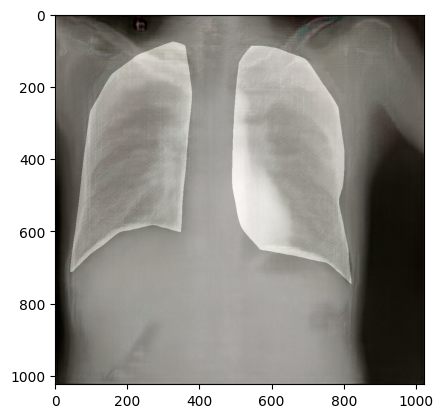

In [23]:

overlay = cv2.addWeighted(image, 0.7, mask, 0.3, 0)

# Display the overlay
plt.imshow(overlay)
plt.show()
